In [41]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_state_city
from ibm_quantum_widgets import *

In [42]:
def diffuser(n):
    qc = QuantumCircuit(n)
    for qubit in range(n):
        qc.h(qubit)
    for qubit in range(n):
        qc.x(qubit)
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)
    qc.h(n-1)
    
    for qubit in range(n):
        qc.x(qubit)
    for qubit in range(n):
        qc.h(qubit)
    
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [43]:
def vertexcolor_oracle(qc, v_list, e_list):
    #qc.x(in_qubits_v[3])
    #qc.x(in_qubits_v[4])
    #qc.x(in_qubits_v[7])


    for j in range(len(e_list)-1):
        qc.x(ax_qubits_e[j])
        
    for j in range(len(e_list)-1):
        hamming = e_list[j]
        for k in range(len(hamming)):
            qc.cx(in_qubits_v[hamming[k]],ax_qubits_e[j])
            
    qc.barrier()
    
    a = []
    for k in e_list[-1]:
        a.append(in_qubits_v[k])
    qc.mct(a,ax_qubits_e[-1] )
    qc.barrier()
    
    #target
    check_qubitslist = []
    for j in range(len(e_list)):
        check_qubitslist.append(ax_qubits_e[j])
    
    qc.mct(check_qubitslist, target[0])
    qc.barrier()

    #reverse part
    
    a = []
    for k in e_list[-1]:
        a.append(in_qubits_v[k])
    qc.mct(a,ax_qubits_e[-1] )
    qc.barrier()
    
    
    for j in range(len(e_list)-1):
        j2 = len(e_list)-j-2
        hamming = e_list[j2]
        for k in range(len(hamming)):
            k2 = len(hamming)-k-1
            qc.cx(in_qubits_v[hamming[k2]],ax_qubits_e[j2])
            
    for j in range(len(e_list)-1):
        qc.x(ax_qubits_e[j])

    qc.barrier()

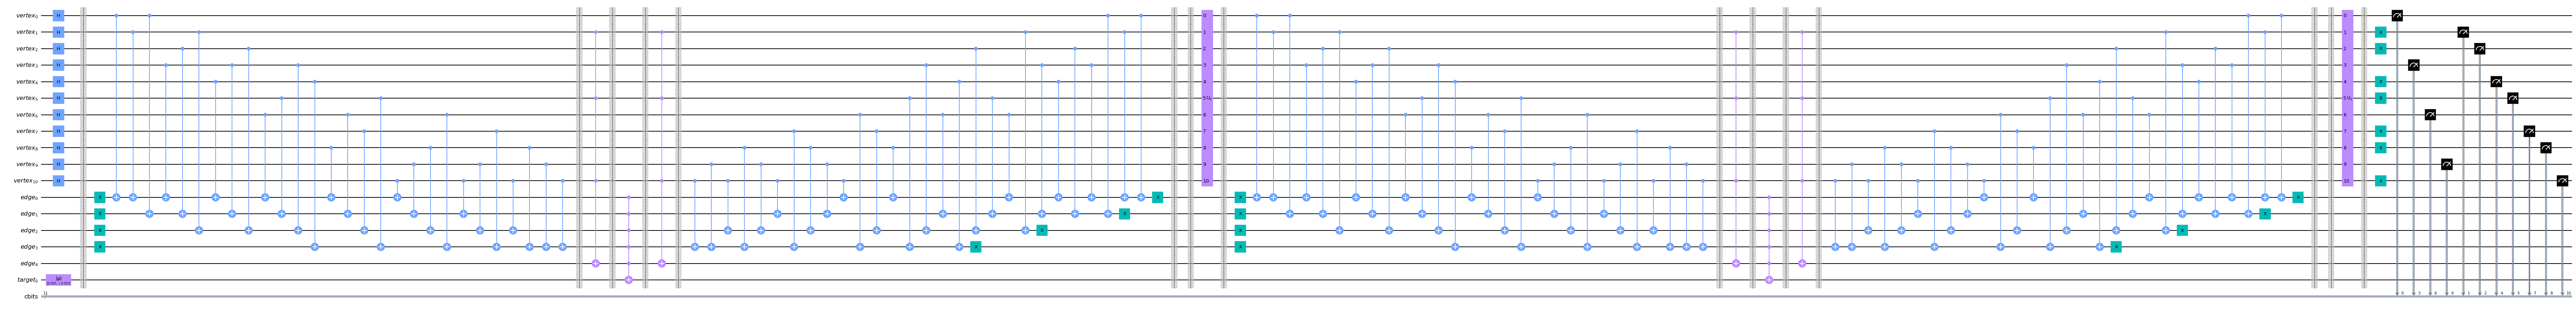

In [81]:
#example (v為vertex, e為edge)
v_list = [3,5,6,7,9,10,11,12,13,14,15]
e_list = [[0,1,3,4,6,8,10],[0,2,3,5,6,9,10],[1,2,3,7,8,9,10],[4,5,6,7,8,9,10],[1,5,10]]
ex_list = [0,1,1,0,1,1,0,1,1,0,1]


#input vertex qubits
in_qubits_v = QuantumRegister(len(v_list), name = 'vertex')
#auxiliary qubits (edge)
ax_qubits_e = QuantumRegister(len(e_list), name = 'edge')
#target qubit
target = QuantumRegister(1, name = 'target')
#cbit:輸出結果
cbits = ClassicalRegister(len(v_list), name = 'cbits')
# choose n prob.
top_n = 130

qc = QuantumCircuit(in_qubits_v, ax_qubits_e, target, cbits)

#initialize 'target' as |->
qc.initialize([1, -1]/np.sqrt(2), target)

#parallelization
qc.h(in_qubits_v)
qc.barrier()

#oracle
vertexcolor_oracle(qc, v_list, e_list)
qc.barrier()

#diffuser
qc.append(diffuser(len(v_list)), list(range(len(v_list))))
qc.barrier()

#可以自行決定要run幾次(每個例子都會有不一樣的最佳次數)

#oracle
vertexcolor_oracle(qc, v_list, e_list)
qc.barrier()

#diffuser
qc.append(diffuser(len(v_list)), list(range(len(v_list))))
qc.barrier()

for j in range(len(ex_list)):
    if ex_list[j] == 1 :
        qc.x(in_qubits_v[j])

#measure
qc.measure(in_qubits_v, cbits)

qc.draw(output='mpl', fold = -1)

In [82]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_sim)
qobj = assemble(transpiled_qc)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
#plot_histogram(counts)
print("o")

o


In [83]:
print(counts)

{'11111011110': 2, '10000011010': 1, '10000001101': 1, '00010000110': 1, '00010010110': 1, '10000110011': 1, '11011000010': 1, '11010101010': 1, '01111011000': 1, '10011110111': 1, '01010110110': 1, '01110000010': 1, '10010010010': 1, '00111010111': 1, '00001101101': 1, '00000111110': 1, '10111010000': 1, '00001100100': 1, '01010110011': 1, '10100011000': 1, '11101111110': 1, '11101011001': 1, '11011101010': 1, '11101010011': 1, '10100110001': 1, '00111110111': 1, '00100101010': 1, '00111111010': 1, '00110111100': 1, '10011101000': 1, '01101010110': 1, '01100010111': 1, '11010100110': 1, '10110000100': 2, '00001000100': 1, '11011101001': 1, '00110001010': 1, '00101111011': 1, '10111100110': 1, '01100001011': 1, '10101001001': 1, '00011110101': 1, '11010001110': 1, '00100110010': 1, '01100110000': 1, '10111110000': 1, '01011101100': 1, '00000011010': 1, '11000000101': 1, '10010111000': 1, '01101010101': 1, '11101000100': 1, '01100101111': 1, '10100001110': 1, '01111111010': 1, '11101001

[['00101011100', 18], ['00011010000', 17], ['00110010100', 16], ['00100000001', 16], ['01100011001', 16], ['00010001101', 14], ['01011001000', 14], ['01110001100', 13], ['01010010101', 12], ['00000011000', 11], ['01000000000', 11], ['00111001001', 11], ['00001000101', 11], ['01111010001', 10], ['01101000100', 9], ['01001011101', 8], ['11010110100', 4], ['11010011000', 3], ['01000100011', 3], ['10010000111', 3], ['00100010001', 3], ['00000110001', 3], ['11011111100', 3], ['11000010000', 3], ['00101101101', 3], ['00110010111', 3], ['10111001011', 3], ['00011010010', 3], ['10100000010', 3], ['10001110100', 3], ['01110011011', 3], ['00000001010', 3], ['10011001010', 3], ['11110011110', 3], ['10111110011', 3], ['00000011101', 3], ['01100110110', 3], ['11111011110', 2], ['10110000100', 2], ['00100111010', 2], ['01010010110', 2], ['01100111001', 2], ['00010110111', 2], ['00111110010', 2], ['01010000111', 2], ['11110010110', 2], ['11011011100', 2], ['11110000110', 2], ['10101000000', 2], ['110

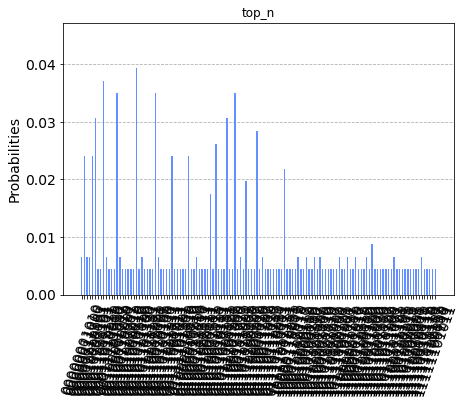

In [84]:
p1 = []
p2 = []
pause = result.get_counts()
pause.clear()
di = dict.fromkeys(counts)
for i in di.keys():
    p1.append([i,counts.get(i)])
p1.sort(key = lambda s: s[1],reverse = True)
print(p1)
for i in range(top_n):
        a = p1[i]
        pause.setdefault(a[0],a[1])
plot_histogram(pause, title="top_n",bar_labels = False)